In [9]:

import pandas as pd  
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from lab2_hw2_utils import *
#from linear_regression_utils import *
#import linear_regression_utils as lr

In [5]:
print("q")

q


In [11]:
#Convert the dataset txt file to csv for convenience

text_file_path = 'household_power_consumption.txt'
csv_file_path = 'household_power_consumption.csv'
#convert_txt_dataset_file_to_csv(text_file_path, csv_file_path)

In [13]:

# Read the text file directly into a DataFrame with ';' as the delimiter
#household_power_consumption_df = pd.read_csv('household_power_consumption.txt', delimiter=';')
household_power_consumption_df = pd.read_csv('household_power_consumption.csv')

C:\Users\elon6\AppData\Local\Temp\ipykernel_19232\3382188800.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  household_power_consumption_df = pd.read_csv('household_power_consumption.csv')


In [17]:
household_power_consumption_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## 2. Exploratory Data Analysis (EDA)

While there are various features in the dataset, the one that helps the most to understand the actual power consumption is the "Global_active_power" feature. Because it includes most of the features that are represented in the dataset, and according to this feature, the Electric Corporation creates the bills to each household.


In [37]:
print("Basic information about the dataset:")
print(household_power_consumption_df.info())
print("\n")



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None




In [38]:
# Convert columns to numerical types if necessary
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in cols_to_convert:
    household_power_consumption_df[col] = pd.to_numeric(household_power_consumption_df[col], errors='coerce')

# After conversion, describe again
household_power_consumption_df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [39]:
print("\nMissing values in each column:")
print(household_power_consumption_df.isnull().sum())
print("\n")

# Optional: Check for unique values in each column
print("\nUnique values in each column:")
print(household_power_consumption_df.nunique())
print("\n")



Missing values in each column:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64



Unique values in each column:
Date                     1442
Time                     1440
Global_active_power      4186
Global_reactive_power     532
Voltage                  2837
Global_intensity          221
Sub_metering_1             88
Sub_metering_2             81
Sub_metering_3             32
dtype: int64




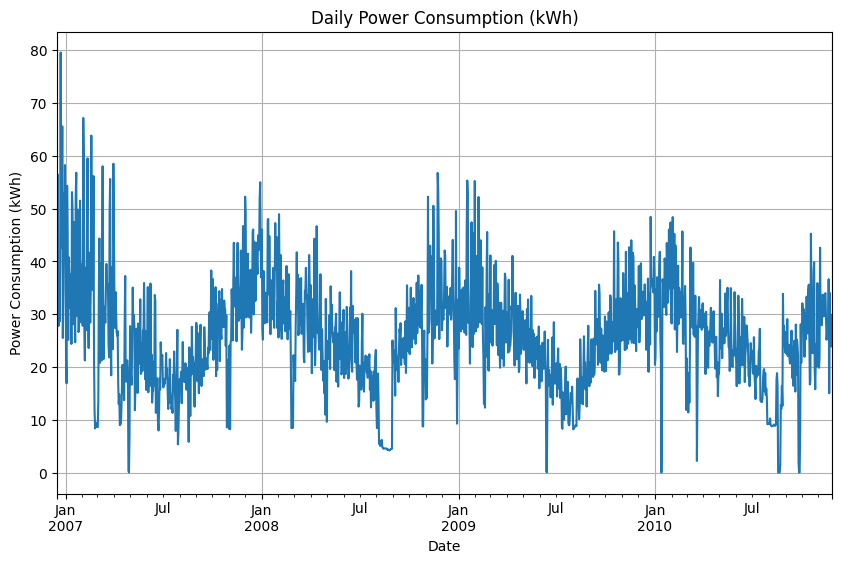

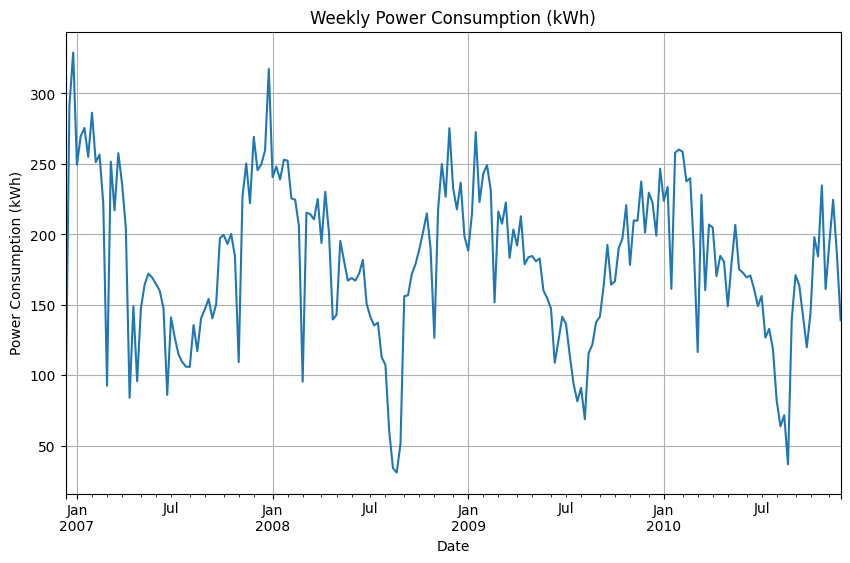

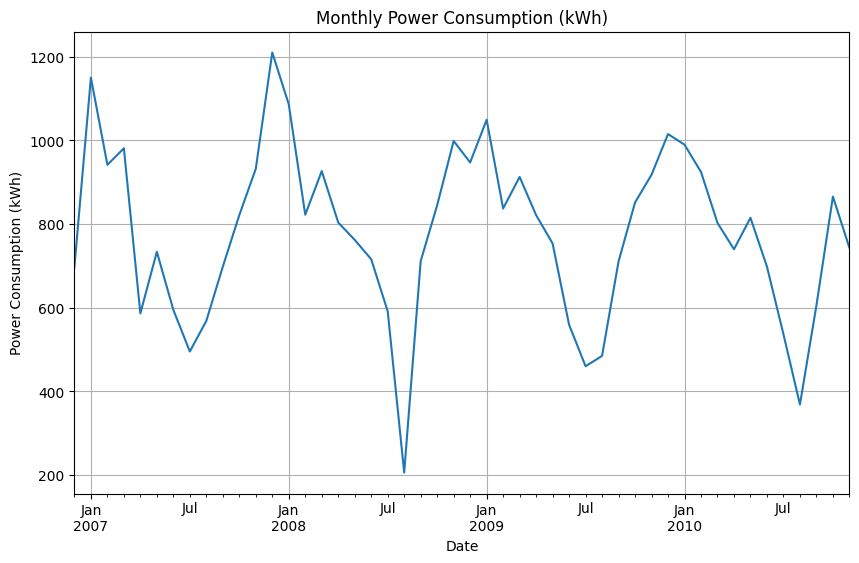

In [40]:

daily_consumption, weekly_consumption, monthly_consumption = calc_active_energy_consumed_per_hour_in_watt_hour(household_power_consumption_df)

plot_power_consumption_period(daily_consumption, 'daily')
plot_power_consumption_period(weekly_consumption, 'weekly')
plot_power_consumption_period(monthly_consumption, 'monthly')

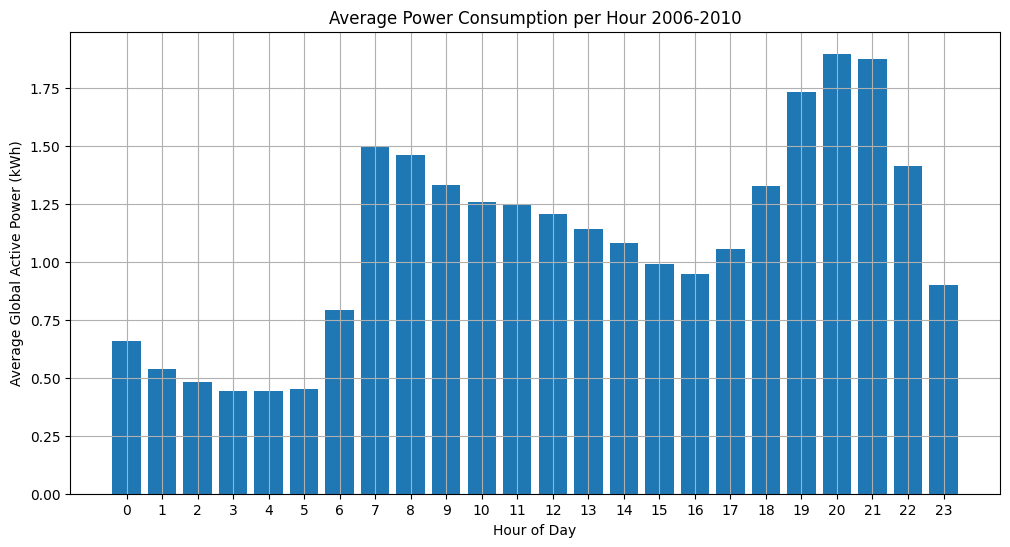

In [41]:
plot_hourly_histogram(calculate_avg_power_consumption_per_hour(household_power_consumption_df))

## Discussion about the results
BLA BLAB LBLABLBLB

#### Handling missing values and outliers

The missing values (Nan values) will be replaced with the median of each feature.
The outliers will be filtered with the help of Z - score, that will filter any value of the feature that devaite more than 3 sigma form the mean. 

In [42]:

# Select only numerical columns
numeric_cols = household_power_consumption_df.select_dtypes(include=[np.number]).columns

# Fill NaN values with median of each column
household_power_consumption_df[numeric_cols] = household_power_consumption_df[numeric_cols].fillna(household_power_consumption_df[numeric_cols].median())

# Calculate Z-scores for the numerical columns
z_scores = np.abs((household_power_consumption_df[numeric_cols] - household_power_consumption_df[numeric_cols].mean()) / household_power_consumption_df[numeric_cols].std())

# Set a threshold (commonly 3 standard deviations)
threshold = 3

# Filter out the outliers
filtered_df = household_power_consumption_df[(z_scores < threshold).all(axis=1)]

# Print the shape of the original and filtered dataframes to see the number of rows removed
print(f"Original dataframe shape: {household_power_consumption_df.shape}")
print(f"Filtered dataframe shape: {filtered_df.shape}")

print("\nMissing values in each column:")
print(household_power_consumption_df.isnull().sum())


Original dataframe shape: (2075259, 9)
Filtered dataframe shape: (1938150, 9)

Missing values in each column:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### 3. Linear regression prediction using lag variables

In [43]:
import  linear_regression_hw2 as lr


model_lag5, y_pred_lag5, y_test_lag5 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 5)
model_lag10, y_pred_lag10, y_test_lag10 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 10)
model_lag30, y_pred_lag30, y_test_lag30 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 30)


### 4. Evaluating the linear regression model

In [44]:
mae_lag5, mse_lag5, rmse_lag5, r2_lag5 = lr.evaluate_performance(y_test_lag5, y_pred_lag5)
mae_lag10, mse_lag10, rmse_lag10, r2_lag10 = lr.evaluate_performance(y_test_lag10, y_pred_lag10)
mae_lag30, mse_lag30, rmse_lag30, r2_lag30 = lr.evaluate_performance(y_test_lag30, y_pred_lag30)


# Print performance metrics
print(f"Lags: 5 - MAE: {mae_lag5:.3f}, MSE: {mse_lag5:.3f}, RMSE: {rmse_lag5:.3f}, R²: {r2_lag5:.3f}")
print(f"Lags: 10 - MAE: {mae_lag10:.3f}, MSE: {mse_lag10:.3f}, RMSE: {rmse_lag10:.3f}, R²: {r2_lag10:.3f}")
print(f"Lags: 30 - MAE: {mae_lag30:.3f}, MSE: {mse_lag30:.3f}, RMSE: {rmse_lag30:.3f}, R²: {r2_lag30:.3f}")


Lags: 5 - MAE: 0.096, MSE: 0.069, RMSE: 0.263, R²: 0.938
Lags: 10 - MAE: 0.097, MSE: 0.068, RMSE: 0.261, R²: 0.938
Lags: 30 - MAE: 0.097, MSE: 0.067, RMSE: 0.259, R²: 0.939


We can see that increasing the number of lags does not improve the accuracy by much. Hence I will take 30 lags that correspond to 30 minutes.


In [45]:
# 3 next time periods prediction

lags = 30
target_col = 'Global_active_power'
household_power_consumption_df_lagged30 = household_power_consumption_df.copy()
    
 # Create lag features
household_power_consumption_df_lagged30 = lr.create_lag_features(household_power_consumption_df, target_col, lags)
# Get the most recent data point for prediction
recent_data = household_power_consumption_df_lagged30.iloc[-lags:][target_col].values.reshape(1, -1)

# To predict the next 3 minutes sequentially
predictions = []
for _ in range(3):
    next_value = model_lag30.predict(recent_data)
    predictions.append(next_value[0])
    
    # Update the recent data with the new prediction, shifting the window
    recent_data = np.roll(recent_data, -1)
    recent_data[0, -1] = next_value[0]

prediction_round = [round(num, 3) for num in predictions]
print(f"Predicted Global Active Power for the next 3 minutes: {prediction_round}")




Predicted Global Active Power for the next 3 minutes: [0.982, 0.974, 0.965]


C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
household_power_consumption_df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### 5.  Recurrent Neural Network (RNN) for power consumption prediction

In [47]:
# import libraries for RNN 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense




In [66]:

import rnn_hw2_utils as rnn

# Ensure only numeric columns are used
numeric_df = household_power_consumption_df.select_dtypes(include=[np.number])

# Create lag features for time series prediction
def create_lag_features(df, target_col, lags):
    df_copy = df.copy()
    for lag in range(1, lags + 1):
        df_copy[f'{target_col}_lag_{lag}'] = df_copy[target_col].shift(lag)
    df_copy.dropna(inplace=True)
    return df_copy

# Number of lag features and target column
lags = 3
target_col = 'Global_active_power'

# Prepare the dataset with lag features
household_power_consumption_df_lagged30 = create_lag_features(numeric_df, target_col, lags)

# Normalize the dataset
scaler = MinMaxScaler()
df_scaled_rnn = pd.DataFrame(scaler.fit_transform(household_power_consumption_df_lagged30), columns=household_power_consumption_df_lagged30.columns)



X, y = create_sequences(df_scaled_rnn, target_col, lags)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, timesteps, features] which is required for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],X_test.shape[2]))

In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def prepare_rnn_data(df, target_col, lags):
    # Ensure only numeric columns are used
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Normalize the dataset
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

    # Create sequences
    X, y = create_sequences(df_scaled, target_col, lags)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, scaler

def create_sequences(df, target_col, lags):
    data = df.values
    target_index = df.columns.get_loc(target_col)
    
    num_samples = len(df) - lags
    num_features = df.shape[1]
    
    X = np.zeros((num_samples, lags, num_features))
    y = np.zeros(num_samples)
    
    for i in range(num_samples):
        X[i] = data[i:i+lags]
        y[i] = data[i+lags, target_index]
    
    return X, y

def build_and_train_rnn(X_train, y_train, lags, num_units=50, epochs=10, batch_size=64):
    # Build the RNN model
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(lags, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    
    return model

def evaluate_model(model, X_test, y_test, scaler, target_col):
    # Predict with the model
    y_pred = model.predict(X_test)

    # Ensure y_pred is 2D for concatenation
    y_pred = y_pred.reshape(-1, 1)

    # Create zero padding for non-target features
    padding = np.zeros((y_pred.shape[0], X_test.shape[2] - 1))

    # Concatenate padding with predictions
    concatenated_pred = np.concatenate((padding, y_pred), axis=1)

    # Inverse transform the predictions
    y_pred_inv = scaler.inverse_transform(concatenated_pred)[:, -1]

    # Similarly, inverse transform the test target values
    y_test_reshaped = y_test.reshape(-1, 1)
    concatenated_test = np.concatenate((padding, y_test_reshaped), axis=1)
    y_test_inv = scaler.inverse_transform(concatenated_test)[:, -1]

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared (R²) value: {r2:.3f}")

# Usage example with 30 lags
target_col = 'Global_active_power'
lags = 30

# Prepare data
X_train, X_test, y_train, y_test, scaler = prepare_rnn_data(household_power_consumption_df, target_col, lags)

# Train RNN
model = build_and_train_rnn(X_train, y_train, lags, num_units=50, epochs=5, batch_size=64)

# Evaluate model
evaluate_model(model, X_test, y_test, scaler, target_col)


C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 8.2828e-04
Epoch 2/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 5.2806e-04
Epoch 3/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 5.2900e-04
Epoch 4/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 5.2020e-04
Epoch 5/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 5.1779e-04
Epoch 6/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 5.1667e-04
Epoch 7/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 94118s 4s/step - loss: 5.0362e-04
Epoch 8/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 5.0099e-04
Epoch 9/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 4.9758e-04
Epoch 10/10
25941/25941 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - loss: 4.8791e-04
12971/12971 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
Mean Absolute Error (MAE): 0.348
Mean Squared Error (MSE): 0.497
Root Mean Squared Error (RMSE): 0.705
R-squared (R²) value: 0.943


### 6. Long Short-Term Memory (LSTM)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(df, target_col, lags):
    # Convert DataFrame to numpy array for faster indexing
    data = df.values
    target_index = df.columns.get_loc(target_col)
    
    # Preallocate X and y arrays
    num_samples = len(df) - lags
    num_features = df.shape[1]
    
    # allocating the array in advance shorten the time significantly
    X = np.zeros((num_samples, lags, num_features))
    y = np.zeros(num_samples)
    
    for i in range(num_samples):
        X[i] = data[i:i+lags]
        y[i] = data[i+lags, target_index]
    
    return X, y


df_scaled_lstm = pd.DataFrame(scaler.fit_transform(household_power_consumption_df_lagged30), columns=household_power_consumption_df_lagged30.columns)
X, y = create_sequences(df_scaled_lstm, target_col, lags)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Reshape input to be 3D [samples, timesteps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))




# Build the LSTM model
model = Sequential([
    LSTM(3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2, verbose=1)



C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 3)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

20753/20753 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 7.6797e-04 - val_loss: 5.3968e-04


In [64]:
# Evaluate the model
y_pred = model.predict(X_test)

# Ensure y_pred is 2D for concatenation
y_pred = y_pred.reshape(-1, 1)

# Create zero padding for non-target features
padding = np.zeros((y_pred.shape[0], X_test.shape[2] - 1))

# Concatenate padding with predictions
concatenated_pred = np.concatenate((padding, y_pred), axis=1)

# Inverse transform the predictions
y_pred_inv = scaler.inverse_transform(concatenated_pred)[:, -1]

# Similarly, inverse transform the test target values
# Make sure y_test is reshaped correctly
y_test_reshaped = y_test.reshape(-1, 1)
concatenated_test = np.concatenate((padding, y_test_reshaped), axis=1)
y_test_inv = scaler.inverse_transform(concatenated_test)[:, -1]

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²) value: {r2:.3f}")


12971/12971 ━━━━━━━━━━━━━━━━━━━━ 9s 681us/step
Mean Absolute Error (MAE): 0.106
Mean Squared Error (MSE): 0.066
Root Mean Squared Error (RMSE): 0.257
R-squared (R²) value: 0.941
